## Programming Assignment: Бэггинг и случайный лес

In [1]:
# import libs
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Функция для записи ответа

In [2]:
def write_answer(index, val):
    with open(f"ans_1_{str(index)}.txt", "w") as fout:
        fout.write(str(val))

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

In [3]:
X, y = datasets.load_digits(return_X_y=True)
print(X.shape)


(1797, 64)


Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [4]:
clf_dt = tree.DecisionTreeClassifier()
scores_dt = cross_val_score(clf_dt, X, y, cv=10)
result_dt = scores_dt.mean()
print("scores", result_dt)

scores 0.8208162631905649


In [5]:
write_answer(1, result_dt)

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [6]:
clf_bagging = BaggingClassifier(n_estimators=100)
scores_bagging = cross_val_score(clf_bagging, X, y, cv=10)
result_bagging = scores_bagging.mean()
print("scores", result_bagging)

scores 0.9231657355679701


In [7]:
write_answer(2, result_bagging)

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на \sqrt{d} 
d
​	  случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [8]:
max_features = int((X.shape[1] ** 0.5))
print("max_features", max_features)
clf_bagging = BaggingClassifier(n_estimators=100, max_features = max_features)
scores_bagging = cross_val_score(clf_bagging, X, y, cv=10)
result_bagging = scores_bagging.mean()
print("scores", result_bagging)

max_features 8
scores 0.925971446306642


In [9]:
write_answer(3, result_bagging)

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же \sqrt{d} 
d
​	  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [10]:
max_features = int((X.shape[1] ** 0.5))
print("max_features", max_features)
clf_bagging = BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(max_features =  max_features), n_estimators=100)
scores_bagging = cross_val_score(clf_bagging, X, y, cv=10)
result_bagging = scores_bagging.mean()
print("scores", result_bagging)

max_features 8
scores 0.947135319677219


In [11]:
write_answer(4, result_bagging)

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

In [12]:
def make_rfc_max(max_features):
    clf = RandomForestClassifier(n_estimators = 100, max_features = max_features)
    return cross_val_score(clf, X, y, cv=10).mean()
def make_rfc_est(n_estimators):
    clf = RandomForestClassifier(n_estimators = n_estimators)
    return cross_val_score(clf, X, y, cv=10).mean()
def make_rfc_d(max_depth):
    clf = RandomForestClassifier(max_depth = max_depth)
    return cross_val_score(clf, X, y, cv=10).mean()


2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

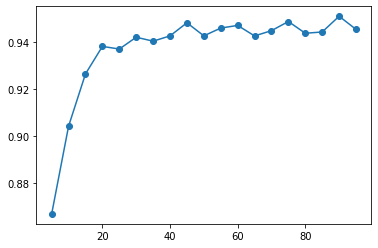

In [13]:
n_estimators_x = np.arange(5,100, 5)
n_estimators_y = []
for x in n_estimators_x:
    n_estimators_y.append(make_rfc_est(n_estimators = x))
    
pylab.plot(n_estimators_x, n_estimators_y, marker='o')    

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

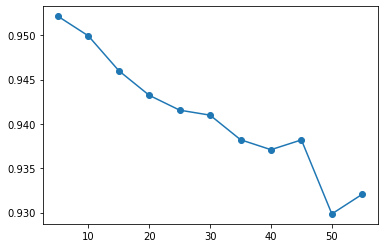

In [14]:
n_features_x = np.arange(5,60, 5)
n_features_y = []
for x in n_features_x:
    n_features_y.append(make_rfc_max(max_features = x))
    
pylab.plot(n_features_x, n_features_y, marker='o')  

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

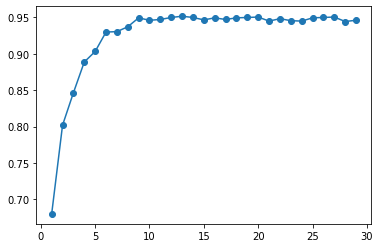

In [15]:
depth_x = np.arange(1, 30, 1)
depth_y = []
for x in depth_x:
    depth_y.append(make_rfc_d(max_depth = x))
    
pylab.plot(depth_x, depth_y, marker='o')  

In [16]:
write_answer(5, "2 3 4 7")